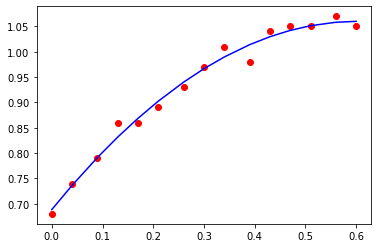

In [17]:
from numpy import *
from numpy.linalg import solve
import matplotlib.pyplot as pp

#CARREGANDO O DATASET
DataSet = array([
[0.00, 0.68],
[0.04, 0.74],
[0.09, 0.79],
[0.13, 0.86],
[0.17, 0.86],
[0.21, 0.89],
[0.26, 0.93],
[0.30, 0.97],
[0.34, 1.01],
[0.39, 0.98],
[0.43, 1.04],
[0.47, 1.05],
[0.51, 1.05],
[0.56, 1.07],
[0.60, 1.05],
])

#Número de linhas
m = DataSet.shape[0]

#Função que recebe uma matriz e retorna a mesma escolonada
def escalonamento(A):
    A = A.copy()
    epsilon = 1e-9
    m,n = A.shape
    for j in range(min(m,n)):
        if abs(A[j,j])<epsilon:
            for i in range(j+1,m):
                if abs(A[i,j])>epsilon:
                    aux = A[i,:].copy()
                    A[i,:] = A[j,:].copy()
                    A[j,:] = aux
                    break      
        if abs(A[j,j])>epsilon:
            for i in range(j+1,m):
                A[i,:] = A[i,:] - A[i,j]/A[j,j]*A[j,:]
    return A

#
def substituicaoReversa(Ab):
    m,n = Ab.shape
    n = n - 1
    A = Ab[:,:n]
    b = Ab[:,n]
    indices = range(m)
    indices = list(indices)
    indices.reverse()
    x = zeros(n)
    for i in indices:
        soma = 0
        for j in range(i+1,m):
            soma = soma + A[i,j]*x[j]
        x[i] = 1/A[i,i]*(b[i] - soma)
    return x


#Matriz "A" irá guardar 
A = column_stack((DataSet[:,0]**2,DataSet[:,0],ones((m,1))))

b = DataSet[:,1]

AA = A.T@A
bb = A.T@b

#AA alfa =  bb
#alfa = solve(AA,bb)

Ab = column_stack((AA,bb))
Abe = escalonamento(Ab)
alfa = substituicaoReversa(Abe)

p = lambda x: alfa[0]*x**2 + alfa[1] * x + alfa[2]

x = DataSet[:,0]

pp.plot(x,b,'or',x,p(x),'b')

#Calculando a raiz para obter o local estimado para o fim da tragétoria do objeto